In [1]:
from pathlib import Path
import re
import pandas as pd
import seaborn as sns


path = Path("/misc/student/hoffmaja/shashank_graphs/")

regex = re.compile("(?P<method>[a-z0-9]+)_(?P<ratio>[0-9\.]+)_(?P<loss>[a-z_]+)")

In [8]:
def read_csv(path, *paths):
    if len(paths):
        return pd.concat([read_csv(p) for p in [path, *paths]], sort=False)

    path = Path(path)

    match = regex.match(path.name)
    df = pd.read_csv(path / "metric.csv").iloc[-1: ]  # Only test
    df["method"] = match.group("method")
    df["ratio"] = float(match.group("ratio"))
    df["loss"] = match.group("loss")

    return df

In [9]:
df = read_csv(*path.glob("*"))
df = df.sort_values(by=["loss", "ratio"])
df["mCE"] = 1 - df.filter(regex="test_acc_*").mean(axis=1)

In [10]:
df_ = df[df["method"] != "orig"]

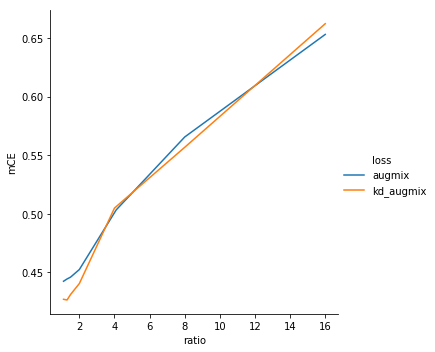

In [12]:
g = sns.relplot(data=df_, x="ratio", y="mCE", hue="loss", kind="line")

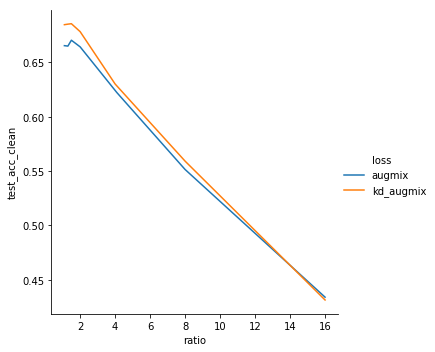

In [13]:
g = sns.relplot(data=df_, x="ratio", y="test_acc_clean", hue="loss", kind="line")